In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from time import time
from kmeans_pytorch import kmeans, kmeans_predict

In [2]:
# set random seed
np.random.seed(123)

In [3]:
# dimensions, num clusters
dims, num_clusters = 2, 3

# data sizes
data_sizes = [100000, 1000000, 5000000, 10000000]

In [ ]:
gpu_times = []
cpu_times = []

for data_size in data_sizes:
    print(f'\ndata size: {data_size}')

    # data
    x = np.random.randn(data_size, dims) / 6
    x = torch.from_numpy(x)

    # gpu
    start_gpu = time()
    kmeans_gpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cuda:0'))
    gpu_time = time() - start_gpu
    gpu_times.append(gpu_time)
    print(f'gpu time: {gpu_time}')
    
    # cpu
    start_cpu = time()
    kmeans_cpu = kmeans(X=x, num_clusters=num_clusters, device=torch.device('cpu'))
    cpu_time = time() - start_cpu
    cpu_times.append(cpu_time)
    print(f'cpu time: {cpu_time}')


data size: 100000
running k-means on cuda:0..


[running kmeans]: 5it [00:00, 526.09it/s, center_shift=0.000058, iteration=6, tol=0.000100]
[running kmeans]: 0it [00:00, ?it/s]
[running kmeans]: 0it [00:00, ?it/s, center_shift=0.177575, iteration=1, tol=0.000100]
[running kmeans]: 1it [00:00, 45.69it/s, center_shift=0.011549, iteration=2, tol=0.000100]
[running kmeans]: 2it [00:00, 60.96it/s, center_shift=0.003620, iteration=3, tol=0.000100]
[running kmeans]: 6it [00:00, 101.05it/s, center_shift=0.000058, iteration=6, tol=0.000100][A



gpu time: 1.8084242343902588
running k-means on cpu..


[running kmeans]: 4it [00:10,  2.51s/it, center_shift=0.000406, iteration=5, tol=0.000100]
[running kmeans]: 5it [00:10,  2.01s/it, center_shift=0.000406, iteration=5, tol=0.000100]
[running kmeans]: 5it [00:10,  2.01s/it, center_shift=0.000131, iteration=6, tol=0.000100]
[running kmeans]: 6it [00:00, 646.77it/s, center_shift=0.000070, iteration=7, tol=0.000100][A

[running kmeans]: 0it [00:00, ?it/s]

[running kmeans]: 0it [00:00, ?it/s, center_shift=0.023596, iteration=1, tol=0.000100]

cpu time: 10.079203367233276

data size: 1000000
running k-means on cuda:0..
gpu time: 0.02549600601196289
running k-means on cpu..




[running kmeans]: 1it [00:00,  5.52it/s, center_shift=0.009139, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 10.99it/s, center_shift=0.009139, iteration=2, tol=0.000100]

[running kmeans]: 2it [00:00, 10.99it/s, center_shift=0.001774, iteration=3, tol=0.000100]

[running kmeans]: 3it [00:00, 10.99it/s, center_shift=0.000496, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 11.38it/s, center_shift=0.000496, iteration=4, tol=0.000100]

[running kmeans]: 4it [00:00, 11.38it/s, center_shift=0.000161, iteration=5, tol=0.000100]

[running kmeans]: 5it [00:00, 11.38it/s, center_shift=0.000054, iteration=6, tol=0.000100]

[running kmeans]: 6it [00:00, 11.52it/s, center_shift=0.000054, iteration=6, tol=0.000100]

cpu time: 0.5440974235534668

data size: 5000000





[running kmeans]: 0it [00:00, ?it/s]


[running kmeans]: 0it [00:00, ?it/s, center_shift=0.065726, iteration=1, tol=0.000100]


[running kmeans]: 1it [00:00, 179.05it/s, center_shift=0.001263, iteration=2, tol=0.000100]


[running kmeans]: 2it [00:00, 219.15it/s, center_shift=0.000347, iteration=3, tol=0.000100]


[running kmeans]: 3it [00:00, 231.04it/s, center_shift=0.000114, iteration=4, tol=0.000100]


[running kmeans]: 4it [00:00, 228.01it/s, center_shift=0.000037, iteration=5, tol=0.000100]

running k-means on cuda:0..
gpu time: 0.18250060081481934
running k-means on cpu..






[running kmeans]: 0it [00:00, ?it/s]



[running kmeans]: 0it [00:00, ?it/s, center_shift=0.069426, iteration=1, tol=0.000100]



[running kmeans]: 1it [00:00,  2.44it/s, center_shift=0.069426, iteration=1, tol=0.000100]

[running kmeans]: 7it [00:25,  3.70s/it, center_shift=0.000070, iteration=7, tol=0.000100]
[running kmeans]: 6it [00:25,  4.22s/it, center_shift=0.000054, iteration=6, tol=0.000100]
[running kmeans]: 5it [00:24,  4.87s/it, center_shift=0.000037, iteration=5, tol=0.000100]
[running kmeans]: 6it [00:22,  3.67s/it, center_shift=0.000051, iteration=6, tol=0.000100]
[running kmeans]: 6it [00:18,  3.08s/it, center_shift=0.000044, iteration=6, tol=0.000100]
[running kmeans]: 7it [00:13,  1.87s/it, center_shift=0.000047, iteration=7, tol=0.000100]


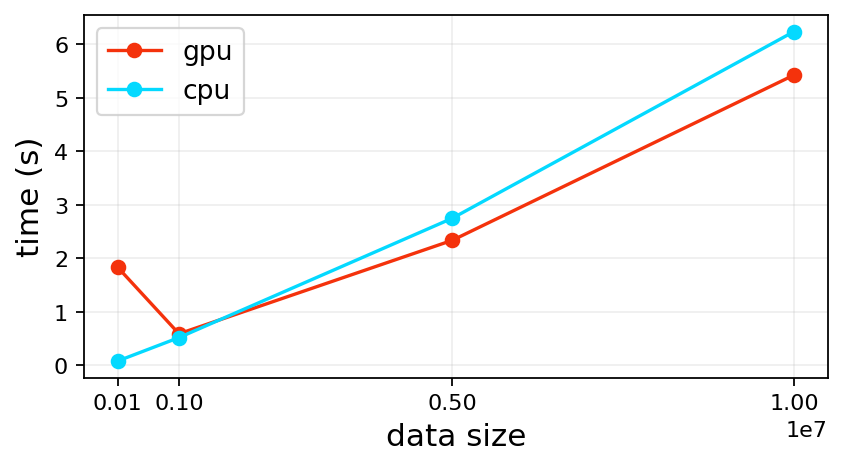

[running kmeans]: 7it [00:26,  3.74s/it, center_shift=0.000048, iteration=7, tol=0.000100]


In [5]:
# plot
plt.figure(figsize=(6, 3), dpi=160)
plt.plot(data_sizes, gpu_times, marker='o', label='gpu', color='xkcd:vermillion')
plt.plot(data_sizes, cpu_times, marker='o', label='cpu', color='xkcd:neon blue')
plt.xticks(data_sizes)
plt.legend(fontsize=12)
plt.grid(alpha=0.2)
plt.xlabel('data size', fontsize=14)
plt.ylabel('time (s)', fontsize=14)
plt.show()